In [1]:
import pandas as pd
import numpy as np
from pandas_visual_analysis import VisualAnalysis, DataSource
from pandas_profiling import ProfileReport

C:\Users\kmmoh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df= pd.read_csv(r'C:\\Users\kmmoh\Downloads\Githubupload\winequality_red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()

In [4]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [5]:
df.shape

(1359, 12)

In [6]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [7]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [8]:
bins=[0,4,7,10]
labels=[0,1,2]
df['quality']=pd.cut(df['quality'],bins=bins,labels=labels)
df['quality'].value_counts()


1    1279
0      63
2      17
Name: quality, dtype: int64

In [9]:
y=df['quality']
X=df.drop(columns='quality')

C:\Users\kmmoh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

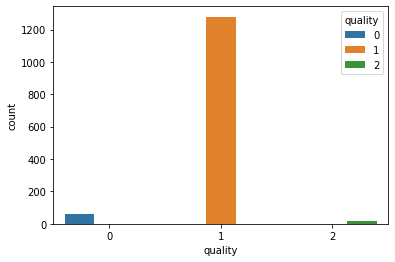

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['quality'],hue=y)

In [11]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [12]:
from sklearn.tree import DecisionTreeClassifier
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=355)
#let's first visualize the tree on the data without doing any pre processing


In [13]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [14]:
clf.score(x_test,y_test)

0.8946078431372549

In [15]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)


In [16]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [17]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 31,
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'splitter': 'random'}

In [18]:
grid_search.best_score_

0.9453403141361256

In [19]:
clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=4,criterion='entropy',splitter='random',min_samples_split=5)
#clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

0.943217665615142

In [20]:
clf.score(x_test,y_test)

0.9387254901960784

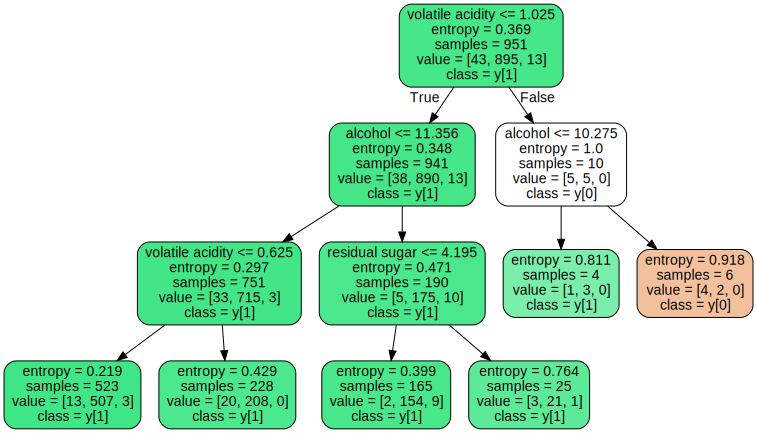

In [21]:
from sklearn.tree import export_graphviz
from subprocess import call
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus
import pydot
from six import StringIO
features = list(df.columns)
features.remove("quality")

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names = features, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

There is a  increase in our test accuracy. Great!!

Although this dataset is realtively small, 
let's use PCA for feature selection and see if it improves our accuracy.

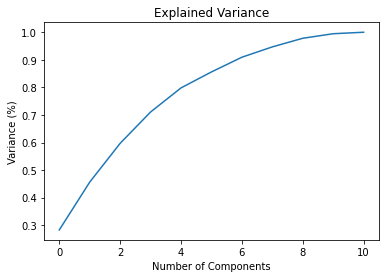

In [22]:
from sklearn.decomposition import PCA
import numpy as np
pca=PCA()
prinicipal_components=pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 8 components. 
So instead of giving all 11 columns as input
in our algorithm let's use these 8 principal components instead.

In [23]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [24]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.617185,0.483047,-1.765381,0.043742,0.011270,-0.918062,-0.168433,-0.251043
1,-0.759750,1.851902,-0.870782,0.519611,0.112362,0.917032,-0.935958,0.797262
2,-0.729912,0.890227,-1.153382,0.383922,0.022574,0.401729,-0.476731,0.624691
3,2.361030,-0.235496,0.198337,-0.897565,-1.509746,-0.087904,0.307927,-0.468899
4,-1.577087,0.604042,-1.532463,0.035250,-0.166895,-0.993503,-0.125875,-0.281985
...,...,...,...,...,...,...,...,...
1354,-1.200620,0.937793,-0.011716,0.854740,-0.253711,-1.135343,-0.624853,0.473913
1355,-2.124125,0.827858,0.647146,0.452104,-0.260273,0.002947,0.107065,-0.365049
1356,-2.171305,0.890541,1.807679,0.478447,0.072095,-0.734304,-0.681637,-0.222212
1357,-2.238165,0.985685,0.643872,0.686969,0.028699,-0.899445,-0.385546,-0.441618


In [39]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
#clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=4,criterion='entropy',splitter='random',min_samples_split=5)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9338235294117647

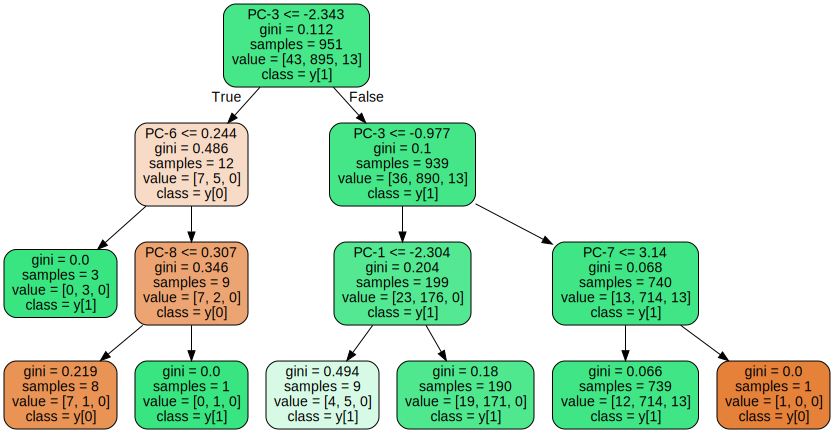

In [40]:
features = list(principal_x.columns)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names = features, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph